# Group Project: OKCupid Date-A-Scientist.


## Introduction

In this project we will analyze data from an on-line dating application called OKCupid.

The goal of this project is to load, prep, analyze, and create machine learning models to be able to prove a relationship between the data and labels.

The data was provided by codecademy.com in a csv files called `profiles.csv`.

## Project Goals
We will check with the available data if we can predict the astrological sign. Some people believe that relationsship compatibility are guided by our atrological signs.

### Data

In the data, each row represents an OkCupid user and the columns are multiple responses to their user profiles which includes multiple-choice, short answer questions and an essay describe themselves.

### Analysis

This project will use descriptive statistics and data visualization to find indicators that will shed some informstion about the relationship between variables. We will use  classification algorithms from the supervised learning family of machine learning models to predict if there is a relationship between the variables and their signs. 

### Evaluation

At the end we will perform an evaluation of the machine learning models selected with a test data set. We will check the results with a confusion matrix, and other metrics such as accuracy, precision, recall and F1 scores. 


The first thing we will do is read the `profile.csv` file into a dataframe and check the shape, columns and data in there.
Some columns have HTML and some other tags and new lines too. We will clean them to be able to get a better data to work with.

In [168]:
import pandas as pd
from bs4 import BeautifulSoup
from html import unescape
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from IPython.display import FileLink, FileLinks
#FileLink('Machine-Learning-Algorithms-Artificial-Intelligence-With-Python-Edureka.png')

profiles = pd.read_csv('./profiles.csv')
print(profiles.columns)
print(profiles.shape)
print(profiles.info())
print(profiles.describe())
print(profiles.head(5))




Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

We have seen some of the columns have tags, new lines and escape characters.
We have to perform some cleanup before using the data.

In [169]:
# Clean columns with HTML tags. escape character and \n
html_cols = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7',       'essay8','essay9','offspring','sign']
# Clean HTML tags
def clean_html(text):
   # Skip NaN values since they will break the cleaning code.
    if pd.isna(text):
        clean_text = text 
    else:
        cleanr = re.compile('<.*?>')
        clean_text = re.sub(cleanr,'',text)
    return clean_text
# Remove escape characters 
def str_unescape(text):
    # Skip NaN values since they will break the uncescape function
    if pd.isna(text):
        clean_txt = text
    else:
        clean_txt = unescape(text)
    return clean_txt 
for col in html_cols:
     profiles[col] = profiles[col].str.replace('\n',' ')
     profiles[col] = profiles[col].apply(lambda x : clean_html(x))
     profiles[col] = profiles[col].apply(lambda x: str_unescape(x))
# Check if the text was cleaned up          
print(profiles.iloc[8])


age                                                           24
body_type                                                    NaN
diet                                           strictly anything
drinks                                                  socially
drugs                                                        NaN
education                      graduated from college/university
essay0                                                       NaN
essay1         oh goodness. at the moment i have 4 jobs, so i...
essay2                                                       NaN
essay3         i'm freakishly blonde and have the same name a...
essay4         i am always willing to try new foods and am no...
essay5         sports/my softball glove coffee. because nobod...
essay6                                                       NaN
essay7         in or out... drinking with friends, maybe a ba...
essay8         potential friends/lovers/people who come in co...
essay9         http://www

Lets check the following columns unique values:
`'body_type'
'diet'
'drinks'
'education'
'offspring'
'sign'
'orientation'
'pets'
'sex'
'smokes'
'status'
'drugs'
'job'
'religion'
'sign'
'speaks'`
to see what we can use to work with or perform further clean up.

In [170]:
# Identify columns with possible values we could work with
col_list = ['body_type','diet','drinks','education','offspring','sign','orientation','pets','sex','smokes','status','drugs','job','religion','sign','speaks']
for col in col_list:
    print(col)
    print(profiles[col].unique())

body_type
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
education
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out o

Lets check the gender distribution on this sample.

['m' 'f']
[35829 24117]


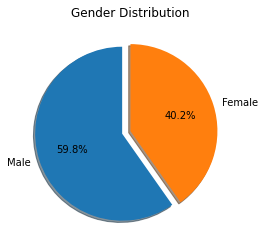

In [171]:
print(profiles.sex.unique())
print(profiles.sex.value_counts().values)
# Plot the distribution of genders
sex_counts = profiles.sex.value_counts().values
explode = (0.1,0)
plt.pie(sex_counts, labels=['Male', 'Female'], explode = explode,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender Distribution')
plt.show()

The outcome of the gender distrubution is 59.8% Males vs 40.2% Females. This tell us the Males are more prone to use a dating service than Females. 

Let check the age distribution by sex to see which age group and sex is more prone to use a dating service.
From the `profiles.info()` we could gather that the maximum age is 110, which looks like a mistake. Lets remove it before plotting the distribution.

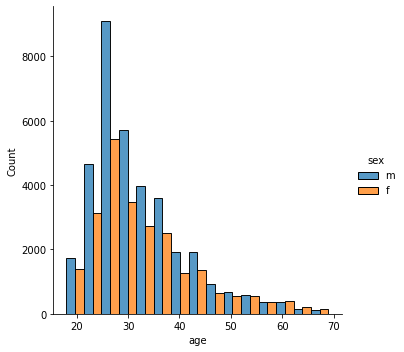

Male Minumium Age: 18.0
Male Maximum Age:  69.0
Male Mean Age:  32.016439656134864
Male Median Age:  30.0
Male Skeweness:  1.2760444420547135
Famale Minumium Age: 18.0
Female Maximum Age:  69.0
Female Mean Age:  32.815019074473376
Female Median Age:  30.0
Female Skeweness:  1.1965226028092146


<Figure size 432x288 with 0 Axes>

In [172]:
profiles.age = profiles[profiles.age < 100]
all_ages = profiles.age
fem_ages = profiles.age[profiles.sex == 'f']
male_ages = profiles.age[profiles.sex == 'm']
sns.displot(profiles, x='age', hue='sex', multiple='dodge', bins=15)
plt.show()
plt.clf()
print('Male Minumium Age:',male_ages.min())
print('Male Maximum Age: ', male_ages.max())
print('Male Mean Age: ', male_ages.mean())
print('Male Median Age: ', male_ages.median())
print('Male Skeweness: ', male_ages.skew())
print('Famale Minumium Age:',fem_ages.min())
print('Female Maximum Age: ', fem_ages.max())
print('Female Mean Age: ', fem_ages.mean())
print('Female Median Age: ', fem_ages.median())
print('Female Skeweness: ', fem_ages.skew())


We can appreciate here that the majority of the user are young, between 25 to 35 years old. The distribution of the data is skewed to thr right showing that the majority are young people. We will normaalize the data for future use.


Due to the skeweness to the right we will use a non-linear transformations, Sklearn offers a `PowerTransformer` class (uses logarithmic functions under the hood) that helps minimize skewness and map any distribution to a normal one as close as possible: 

2
0.03915064300369259


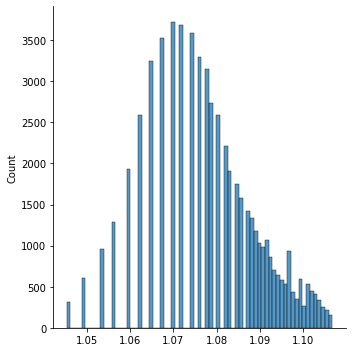

<Figure size 432x288 with 0 Axes>

In [173]:
from scipy import stats
# Remove skeweness by using coxbox and find NaN values and replace them with the mean value
print(profiles.age.isnull().sum())
profiles.age = profiles.age.fillna(profiles.age.mean())
#norm_age = np.log(profiles.age)
#print(norm_age.skew())
#sns.displot(norm_age)
norm_age = pd.Series(stats.boxcox(profiles.age)[0])
print(norm_age.skew())
sns.displot(norm_age)
plt.show()
plt.clf()



We have minimized the skeweness and normalized the data.
Lets look into the `income` column. We have the minimum value as -1 and the maximum as 1,000,000. Let take a look as the frequency and distribution to check if it makes sense to work with the column's data.



Salary distribution
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


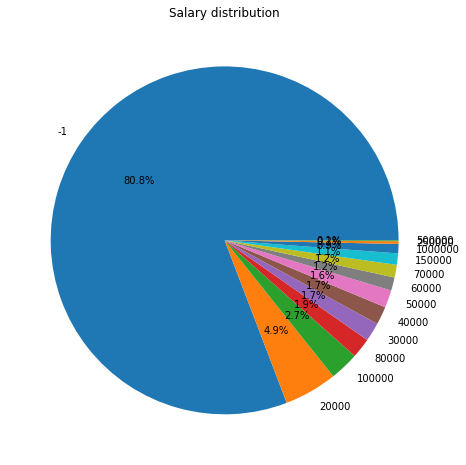

<Figure size 432x288 with 0 Axes>

In [174]:
income_dist = profiles.income.value_counts()
print('Salary distribution')
print(income_dist)
labels = income_dist.keys()
plt.figure(figsize=(10, 8))
plt.pie(income_dist, labels=labels, autopct='%1.1f%%')
plt.title('Salary distribution')
plt.show()
plt.clf()


This columns has a lot of rows 80% with -1 as a `income`. We can conclude that users feel that money  should not play an important role as a dating factor. Therefore we can't use this columns to predict much.
Let look at the `height` columns and see the data.


We can appreciate from the initial data survey that there are very small heights. We will clean them up by removing anything below or equal to 20 inches.

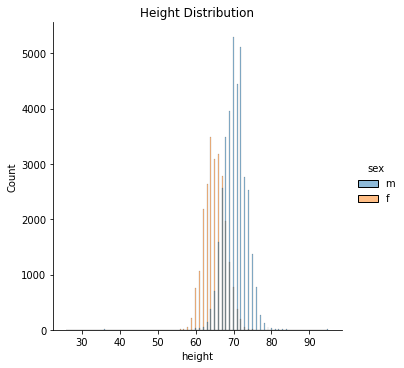

Male Minumium Height: 26.0
Male Maximum Height:  95.0
Male Mean Height:  70.44902858418936
Male Median Height:  70.0
Famale Minumium Height: 36.0
Female Maximum Height:  95.0
Female Mean Height:  65.11122630945962
Female Median Height:  65.0


<Figure size 432x288 with 0 Axes>

In [175]:
#Eliminate bogus data like height below 20 inches
profiles = profiles[profiles.height >= 20.0]
all_height = profiles.height
fem_height = profiles.height[profiles.sex == 'f']
male_height = profiles.height[profiles.sex == 'm']
sns.displot(profiles, x='height',  hue='sex')
plt.title('Height Distribution')
plt.show()
plt.clf()
print('Male Minumium Height:',male_height.min())
print('Male Maximum Height: ', male_height.max())
print('Male Mean Height: ', male_height.mean())
print('Male Median Height: ', male_height.median())
print('Famale Minumium Height:',fem_height.min())
print('Female Maximum Height: ', fem_height.max())
print('Female Mean Height: ', fem_height.mean())
print('Female Median Height: ', fem_height.median())





Here we can appreciete a normal height distributions where the males are taller than the females. We can see that the males are 5 inches taller than females in average.
Let now check the distribution of body types.


Body Type distribution
average           14652
fit               12710
athletic          11818
thin               4710
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


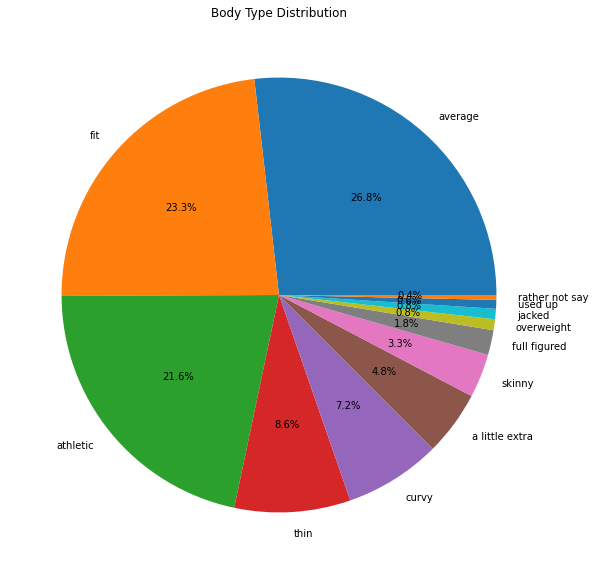

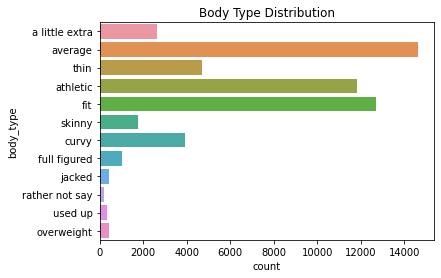

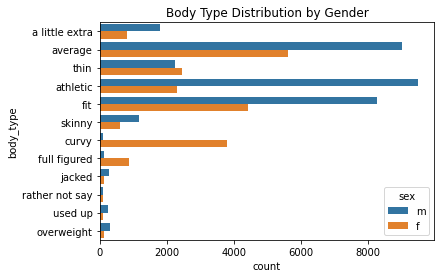

<Figure size 432x288 with 0 Axes>

In [176]:
bt_dist = profiles.body_type.value_counts()
print('Body Type distribution')
print(bt_dist)
labels = bt_dist.keys()
plt.figure(figsize=(12, 10))
plt.pie(bt_dist, labels=labels, autopct='%1.1f%%')
plt.title('Body Type Distribution')
plt.show()
plt.clf()
# Check the data in a horizontal countplot
sns.countplot(data=profiles, y="body_type")
plt.title('Body Type Distribution')
plt.show()
plt.clf()
# Check the data by gender
sns.countplot(data=profiles, y="body_type", hue = "sex")
plt.title('Body Type Distribution by Gender')
plt.show()
plt.clf()

We can determine that the majority of the people have a skinny, thin, athletic or fit body type. A quarter claim to be average and very few describe themselves as overweight. Based on the demographics I do not believe that's true. Some of the averages might be overweight.
When doing a `body_type` by `sex` we can see the differences between how each gender describe themselves. Females use terms as curvy or full figured.


Let check the `diet` column and find out what the distribution.

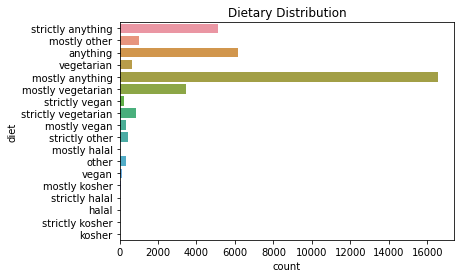

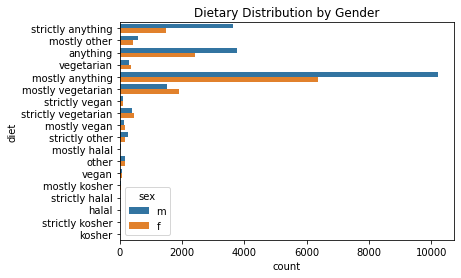

<Figure size 432x288 with 0 Axes>

In [177]:
sns.countplot(data=profiles, y="diet")
plt.title('Dietary Distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="diet", hue='sex')
plt.title('Dietary Distribution by Gender')
plt.show()
plt.clf()

We can appreciate that the majority will eat anything however females lead the different vegetarian diets more ths men. This shows the pressure to maintain an attractive body.

Lets analyze the `drink` column data and check any patterns.


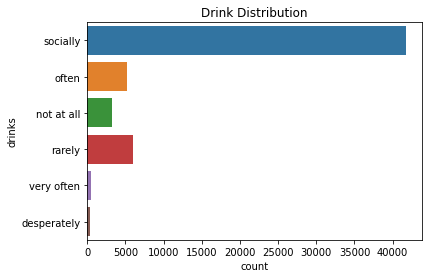

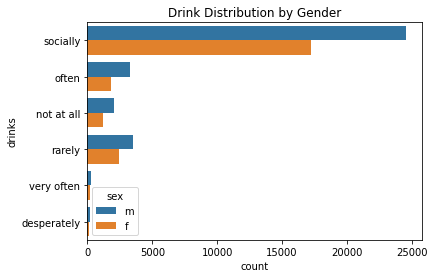

<Figure size 432x288 with 0 Axes>

In [178]:
sns.countplot(data=profiles, y="drinks")
plt.title('Drink Distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="drinks", hue='sex')
plt.title('Drink Distribution by Gender')
plt.show()
plt.clf()


We can see that both males and females behave the same when it comes to drinking. Most of them do it socially, rarely, often and then not at all.

Lets take a look at the drugs column and determina what we can appreciate.

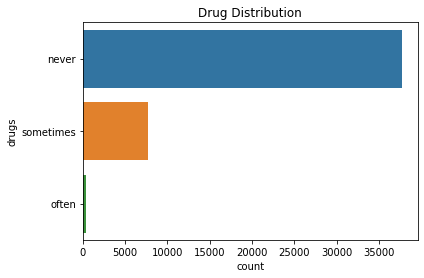

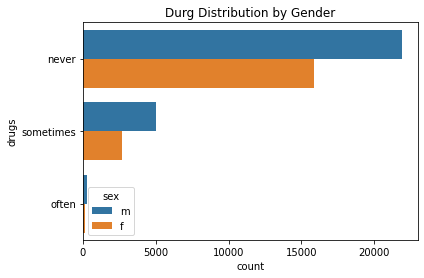

<Figure size 432x288 with 0 Axes>

In [179]:
sns.countplot(data=profiles, y="drugs")
plt.title('Drug Distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="drugs", hue='sex')
plt.title('Durg Distribution by Gender')
plt.show()
plt.clf()

From this graphic we can determine that both female and males behave the same way about drugs. The majority don't comsume them and a minority use them occasionally and very few use them often.

Lets review the education and see what we can see abou it.


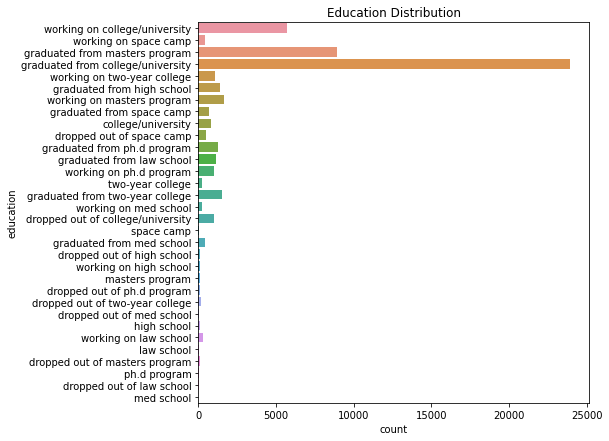

<Figure size 432x288 with 0 Axes>

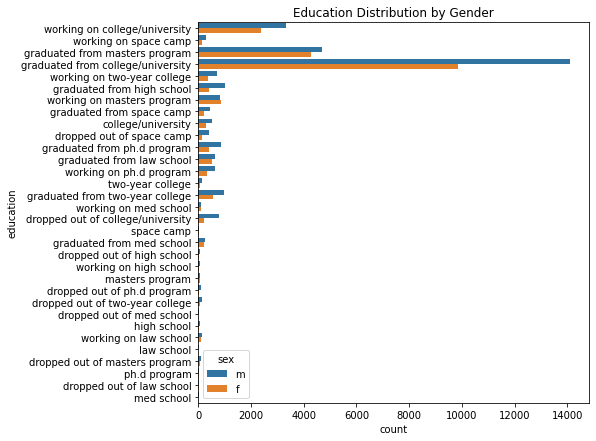

<Figure size 432x288 with 0 Axes>

In [180]:
plt.figure(figsize=(7,7))

sns.countplot(data=profiles, y="education")
plt.title('Education Distribution')
plt.show()
plt.clf()

plt.figure(figsize=(7,7))
sns.countplot(data=profiles, y="education", hue='sex')
plt.title('Education Distribution by Gender')
plt.show()
plt.clf()


We can determine from this data that the majority of people has or is working on their bachelor's degree or has a higher education like Master's.


Lets see what the job column has to show.


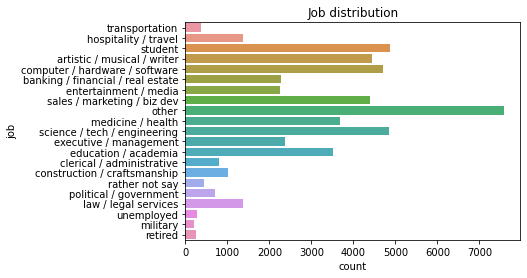

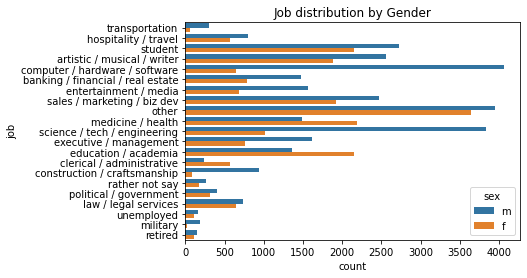

<Figure size 432x288 with 0 Axes>

In [181]:

sns.countplot(data=profiles, y="job")
plt.title('Job distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="job", hue='sex')
plt.title('Job distribution by Gender')
plt.show()
plt.clf()

From this ditribution we can conclude than males have more STEM (science, technology, engineering and mathematics) jobs than females. Also a big percentage they've chosen other as the job description.

Let review the `offspring` column and see what it has to say.

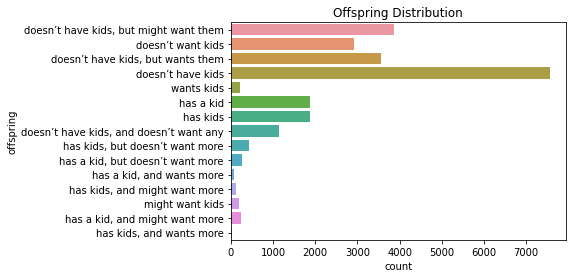

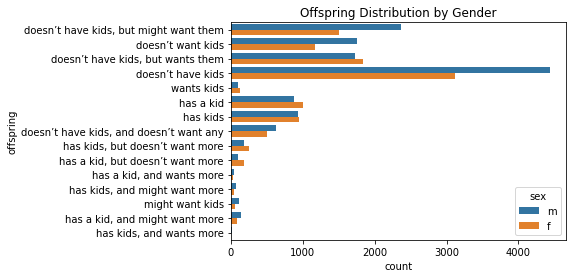

<Figure size 432x288 with 0 Axes>

In [182]:
sns.countplot(data=profiles, y="offspring")
plt.title('Offspring Distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="offspring", hue='sex')
plt.title('Offspring Distribution by Gender')
plt.show()
plt.clf()

From this distribution we can deduct that most ot the people do not have kids. Some might want them and some do not. 

Lets look at orientation and see what kind of distribution we get.

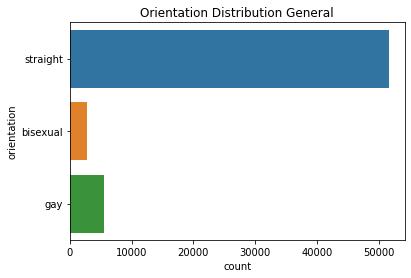

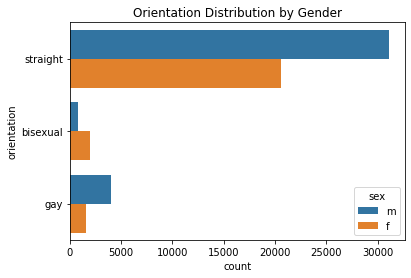

<Figure size 432x288 with 0 Axes>

In [183]:
sns.countplot(data=profiles, y="orientation")
plt.title('Orientation Distribution General')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="orientation", hue='sex')
plt.title('Orientation Distribution by Gender')
plt.show()
plt.clf()

From our graphics we can see the majority of the people are straight and the females have a higher percentage of being bisexual 2 to 1 versus Males.

Let review the peta columns and see what kind of information will provide.


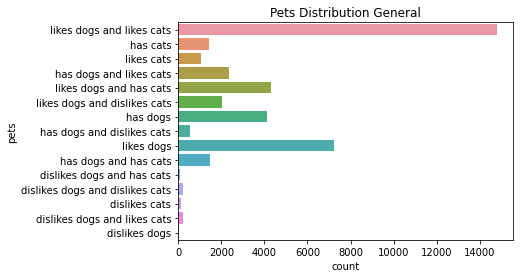

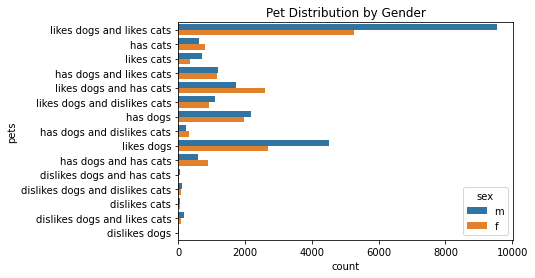

<Figure size 432x288 with 0 Axes>

In [184]:
sns.countplot(data=profiles, y="pets")
plt.title('Pets Distribution General')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="pets", hue='sex')
plt.title('Pet Distribution by Gender')
plt.show()
plt.clf()

Dogs a the preferred pet over all, but females like cats better.

Lets analyze religion and see what kind of distribution we can get.

20222
Percentage of people with no answer 0.33738759030315163


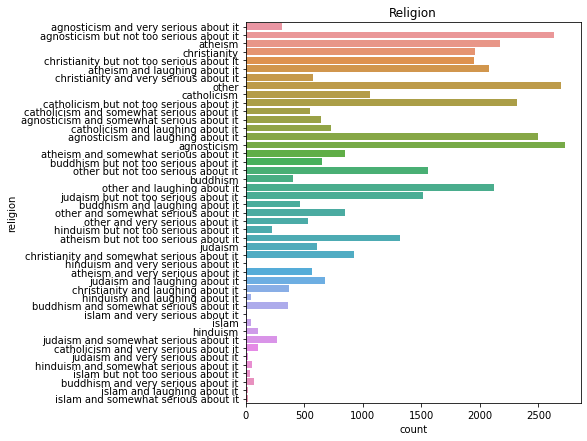

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize=(6,7))
print(profiles.religion.isna().sum())
print('Percentage of people with no answer',profiles.religion.isna().sum() /len(profiles))
sns.countplot(data=profiles, y="religion")
plt.title('Religion')
plt.show()
plt.clf()

We see a lot of information about their believes. We can try to summarize it in a more generic way by taking the first word or their beliefs.

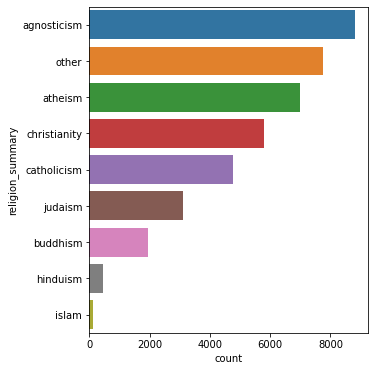

<Figure size 432x288 with 0 Axes>

In [186]:
profiles['religion_summary'] = profiles.religion.str.split().str.get(0)
plt.figure(figsize=(5,6))
sns.countplot(data=profiles, y="religion_summary", order=profiles.religion_summary.value_counts().index)
plt.show()
plt.clf()

Let analyze the signs and see what we can come up with.


Percentage of people with no answer 0.18441029747901963


<AxesSubplot:xlabel='count', ylabel='sign'>

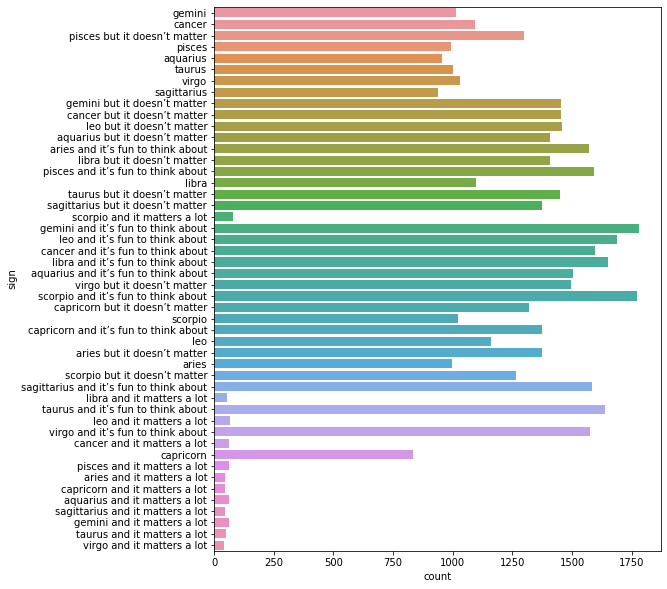

In [187]:
plt.figure(figsize=(8,10))
print('Percentage of people with no answer',profiles.sign.isna().sum() /len(profiles))
sns.countplot(data=profiles, y="sign")

Let perform some cleanup and summarize the signs for easy of manipulation.

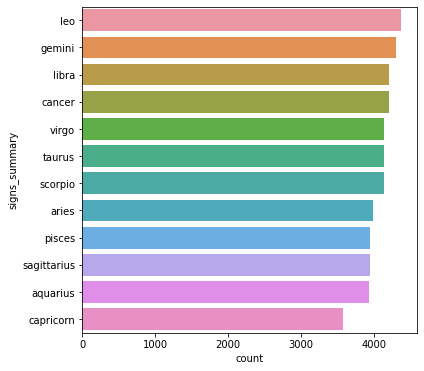

<Figure size 432x288 with 0 Axes>

In [188]:
profiles['signs_summary'] = profiles.sign.str.split().str.get(0)
plt.figure(figsize=(6,6))
sns.countplot(data=profiles, y="signs_summary", order=profiles.signs_summary.value_counts().index)
plt.show()
plt.clf()

From this sorted distribution we can see that Leo has la largest group and Capricorn has the lowest.

Now lets check the smoking column.


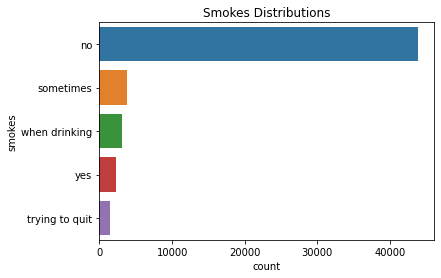

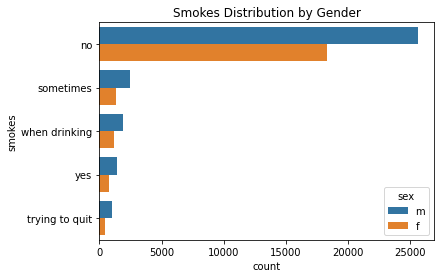

<Figure size 432x288 with 0 Axes>

In [189]:
sns.countplot(data=profiles, y="smokes", order=profiles.smokes.value_counts().index)
plt.title('Smokes Distributions')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="smokes", hue='sex', order=profiles.smokes.value_counts().index )
plt.title('Smokes Distribution by Gender')
plt.show()
plt.clf()

We can conclude that most of the users do not smoke. This is true for both genders.


### Status
Lets check what type of information we can get from this column.


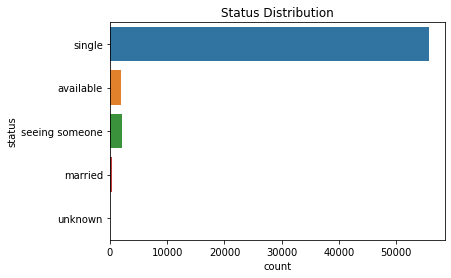

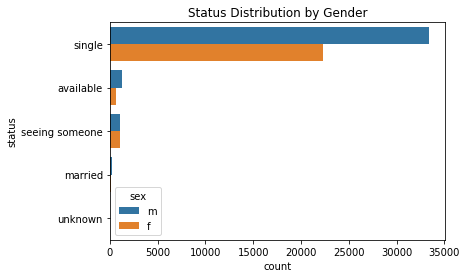

<Figure size 432x288 with 0 Axes>

In [190]:
sns.countplot(data=profiles, y="status")
plt.title('Status Distribution')
plt.show()
plt.clf()
sns.countplot(data=profiles, y="status", hue='sex')
plt.title('Status Distribution by Gender')
plt.show()
plt.clf()

The data shows thah the majority of the users are single. However there is an interesting twist when it comes with seeing someone. The females have a higher percentage than males.

### Prepare the Data
#### Missing Data
Let check how many Null values we have per column. This will give us an idea of the data.
Most likely we will have to drop some of this to be used as subset variables for the ML method we will use. We will select some columns that I think will be valuable to predict the Sign.


In [191]:
# Check for Null values per column
profiles.isnull().sum()

age                     0
body_type            5290
diet                24389
drinks               2982
drugs               14076
education            6625
essay0               5486
essay1               7570
essay2               9636
essay3              11474
essay4              10536
essay5              10847
essay6              13770
essay7              12449
essay8              19224
essay9              12602
ethnicity            5677
height                  0
income                  0
job                  8196
last_online             0
location                0
offspring           35554
orientation             0
pets                19918
religion            20222
sex                     0
sign                11053
smokes               5510
speaks                 50
status                  0
religion_summary    20222
signs_summary       11053
dtype: int64

###Futher data clean up and preprocessing.
Is it important to select variables that we believe are meaningful to our model. We will perform some cleanup to eliminate NaNs.

In [192]:
# List of columns to use 
col_list = ['diet','drinks','orientation','smokes','drugs','job','religion_summary','signs_summary']

# Eliminate all NaN rows
new_df = profiles[col_list].dropna()
# Check resulting array
new_df.shape

(16482, 8)

Now we will convert all these qualitative variables into quantitatives (Dummy Variables) to be able to use them in our model. We will use the These new variables are useful because they enable us to use a single regression equation to represent multiple groups

In [193]:
# Convert these list of variables into dummies except the signs
for col in col_list[:-1]:
    #print(col)
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])
new_df.head(5)

,signs_summary,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,...,job_unemployed,religion_summary_agnosticism,religion_summary_atheism,religion_summary_buddhism,religion_summary_catholicism,religion_summary_christianity,religion_summary_hinduism,religion_summary_islam,religion_summary_judaism,religion_summary_other
0,gemini,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,cancer,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,sagittarius,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,cancer,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,leo,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Once we have done this. Lets check the new signs distriubution to check if there is enough data for each sign.


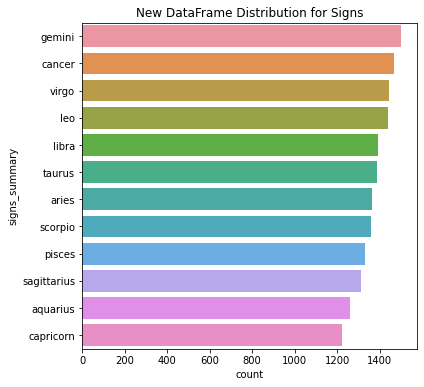

<Figure size 432x288 with 0 Axes>

In [194]:
plt.figure(figsize=(6,6))
sns.countplot(data=new_df, y="signs_summary", order=new_df.signs_summary.value_counts().index)
plt.title('New DataFrame Distribution for Signs')
plt.show()
plt.clf()

Separate the data and the labels for the model.

In [195]:
# Get the variables or the model
data = new_df.iloc[:, 1:len(new_df.columns)]
# Get the labels for the model
labels = new_df.iloc[:, 0:1]
print(labels)
# Flatten the array
labels = labels.squeeze()
labels = labels.ravel()
print(labels)
# We have our labels for our model!

# Check data
print(data.head(5))
print(data.isnull().sum())

      signs_summary
0            gemini
1            cancer
7       sagittarius
9            cancer
11              leo
...             ...
59930         aries
59936         virgo
59942           leo
59943   sagittarius
59944           leo

[16482 rows x 1 columns]
['gemini' 'cancer' 'sagittarius' ... 'leo' 'sagittarius' 'leo']
    diet_anything  diet_halal  diet_kosher  diet_mostly anything  \
0               0           0            0                     0   
1               0           0            0                     0   
7               0           0            0                     1   
9               0           0            0                     1   
11              0           0            0                     1   

    diet_mostly halal  diet_mostly kosher  diet_mostly other  \
0                   0                   0                  0   
1                   0                   0                  1   
7                   0                   0                  0   
9    

Check if the lenght of the data and labels are the same.

In [196]:
# Just to make sure they are the same length
print(len(data), len(labels))
print(data.shape, labels.shape)

16482 16482
(16482, 65) (16482,)


#### Splitting Data

Next the data needs to be split into train and test sets. I will use the reccomended split of 20% of the data that is reserved for the final test, while 80% is kept for training the model. 

In [197]:
# Test size it is recommended a 20%
test_size = 0.20

#Split the data into Train and Test
#Import train test split module
from sklearn.model_selection import train_test_split 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=test_size, random_state = 1)

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(13185, 65) (13185,)
(3297, 65) (3297,)


### Predict

Let user 3 different modules to check which one gives us better results.

Here is a list of [Classification models](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/06/Machine-Learning-Algorithms-Artificial-Intelligence-With-Python-Edureka.png) available in scikit learn. For this project three common algorithms will be used to make predictions.

Since all of our data is binary we will use Binary Classification.

Binary classification refers to those classification tasks that have two class labels.

The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.
Popular algorithms that can be used for binary classification include:

- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

Lets use the first three popular modules, Logistic Regression, Decision Trees, and K-Neareast Neighbors.


In [198]:
# Load 3 most common classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Most Common ML Evaluation Metrics

Most common ML evaluation metrics
![](metrics.JPG)

This is a Multi-Label Classification, since we have more than two astrological signs.

Multi-label classification refers to those classification tasks that have two or more class labels, where one or more class labels may be predicted for each example.

Lets start with the model `Logistic Regression`.
Since this is multi-label we will use `multi_class="multinomial"` in our `LogisticRegression`.

In [199]:
log_reg_model = LogisticRegression(multi_class="multinomial",solver="lbfgs",        max_iter=5000).fit(train_data, train_labels)

guesses = log_reg_model.predict(test_data)


The `classification_report` visualizer displays the precision, recall, F1, and support scores for the model. For more information about the `classification_report` check this [link](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

In [200]:
# Load classification_report
from sklearn.metrics import classification_report
# Print all values
print(classification_report(test_labels, guesses))

              precision    recall  f1-score   support

    aquarius       0.10      0.04      0.06       257
       aries       0.08      0.10      0.09       255
      cancer       0.09      0.22      0.13       269
   capricorn       0.09      0.03      0.05       251
      gemini       0.09      0.09      0.09       332
         leo       0.08      0.06      0.07       298
       libra       0.08      0.06      0.07       287
      pisces       0.07      0.03      0.04       256
 sagittarius       0.03      0.02      0.02       251
     scorpio       0.17      0.06      0.09       294
      taurus       0.06      0.08      0.07       275
       virgo       0.09      0.19      0.12       272

    accuracy                           0.08      3297
   macro avg       0.09      0.08      0.07      3297
weighted avg       0.09      0.08      0.08      3297



Based on the results we have obtained from the LogisticRegression we can determine that the 9% is a very bad result. It would be very similar to guess 1/12 ~8%.

### K-Nearest Neighbors
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. Lets use the default value of `n_neighbors` which is 5.


In [201]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5).fit(train_data, train_labels)
knn_guesses = knn_classifier.predict(test_data)

# Evaluate accuracy
print(classification_report(test_labels, knn_guesses))

              precision    recall  f1-score   support

    aquarius       0.11      0.27      0.15       257
       aries       0.09      0.19      0.12       255
      cancer       0.08      0.12      0.10       269
   capricorn       0.11      0.11      0.11       251
      gemini       0.10      0.09      0.10       332
         leo       0.09      0.05      0.07       298
       libra       0.15      0.09      0.11       287
      pisces       0.11      0.08      0.09       256
 sagittarius       0.11      0.06      0.08       251
     scorpio       0.11      0.07      0.09       294
      taurus       0.10      0.05      0.07       275
       virgo       0.06      0.03      0.04       272

    accuracy                           0.10      3297
   macro avg       0.10      0.10      0.09      3297
weighted avg       0.10      0.10      0.09      3297



This model did not improve the outcome we are still at 10%.

### Decision Trees
This model is mostly used for classification problems but it can do regressions too. 
Together they are called as CART(classification and regression tree).

We will use the default hyperparameters in this case.

Modeling Tree and testing it


In [202]:
# Defining the decision tree 
cart_model = DecisionTreeClassifier().fit(train_data, train_labels) 
# Predicting the values of test data
cart_guesses = cart_model.predict(test_data) 

print(classification_report(test_labels, cart_guesses))

              precision    recall  f1-score   support

    aquarius       0.09      0.14      0.11       257
       aries       0.07      0.12      0.08       255
      cancer       0.07      0.11      0.08       269
   capricorn       0.09      0.09      0.09       251
      gemini       0.10      0.11      0.11       332
         leo       0.09      0.08      0.08       298
       libra       0.10      0.08      0.09       287
      pisces       0.08      0.07      0.07       256
 sagittarius       0.10      0.07      0.08       251
     scorpio       0.10      0.06      0.08       294
      taurus       0.06      0.04      0.05       275
       virgo       0.07      0.05      0.06       272

    accuracy                           0.08      3297
   macro avg       0.09      0.08      0.08      3297
weighted avg       0.09      0.08      0.08      3297



The results are very dissapointing we only achieve a 8% accuracy.

Lets plot the confusion matrix of the CART model.

12


Text(0.5, 1.0, 'Accuracy Score: 0.08401577191386109')

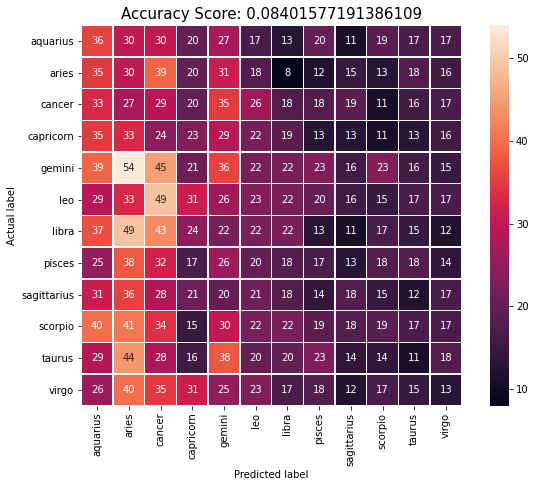

In [227]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(test_labels, cart_guesses)
cart_labels = cart_model.classes_
print(len(cart_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=0)
plt.xticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(cart_model.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

We can just prove that the prediction does not work very well. 

### Conclusion

In this project we used several machine learning models to predict the astrological signs of OkCupid users. Since many people believe in astrology and matches between compatible star signs. We'd hope to be able to predict the astrological sign to prove that all signs behave the same or have the same characteristics. Probably we would need more variables or tune the methods better.

At the end none of the models did better than basic guessing.
